<h1> Utrecht Summer School 'Introduction to Complex Systems' </h1>
<h2> Day 2. Project Networks - Kuramoto </h2>

This Jupyter notebook contains the parameters that can be changed. It calls the function that will perform the simulation, computation and visualisation. Only this notebook needs to be amended.

<h3> Dependencies </h3>

The codes used in this project depend on complementary Python files. Specificially, the following packages need to be installed.
<h4> Packages needed </h4>
<ul>
    <li> numpy </li>
    <li> matplotlib </li>
    <li> IPython </li>
    <li> networkx </li>
</ul>

<h1> Import the python codes </h1>

In [1]:
## DO NOT CHANGE THIS
%matplotlib notebook

from Kuramoto_functions import Kuramoto_simulator
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/h9/5szpc9m937z0spc83qhrkc440000gp/T/ipykernel_74005/2490473785.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<h1> Parameters </h1>

In [2]:
# Parameters are packed into a class for easy passing of all parameter values to the simulator function

class Parameters:
    ## GENERAL PARAMETERS
    
    # Number of oscillators
    N = 20
    
    # Coupling Strength
    K = 0.5
    
    # Order parameter function
    def orderParameter(x):
        return np.abs( np.sum(np.exp(1j*x)) )/len(x)
        
    ## Connections between oscillators
    # A = np.ones((N,N)) - np.eye(N)
    # A = np.diag( np.ones(N-1), 1) + np.diag( np.ones(N-1), -1)
    p = 0.1
    A = np.triu( np.random.rand(N,N) < p, 1)
    A = A + A.transpose()
    A = A.astype(int)
    
# Finally, we create one instance of this class that now contains all parameters
par = Parameters;

<h1> Simulation Settings </h1>

In [3]:
# Simulation settings are packed into a class for easy passing of all settings to the simulator function

class SimSettings:
    
    updatePlot = True # do we want to update the plot during the simulation?
    plotEvolution = True # do we plot the evolutions after the simulation?
    
    plot_interval = 10; # Output a new figure every so many time steps
    
    T = 600 # Endtime
    dt = 0.1 # simulation timestep
    
# Finally, we create one instance of this class that now contains all settings
sim_set = SimSettings;

<h1> Actual Simulation </h1>

<IPython.core.display.Javascript object>


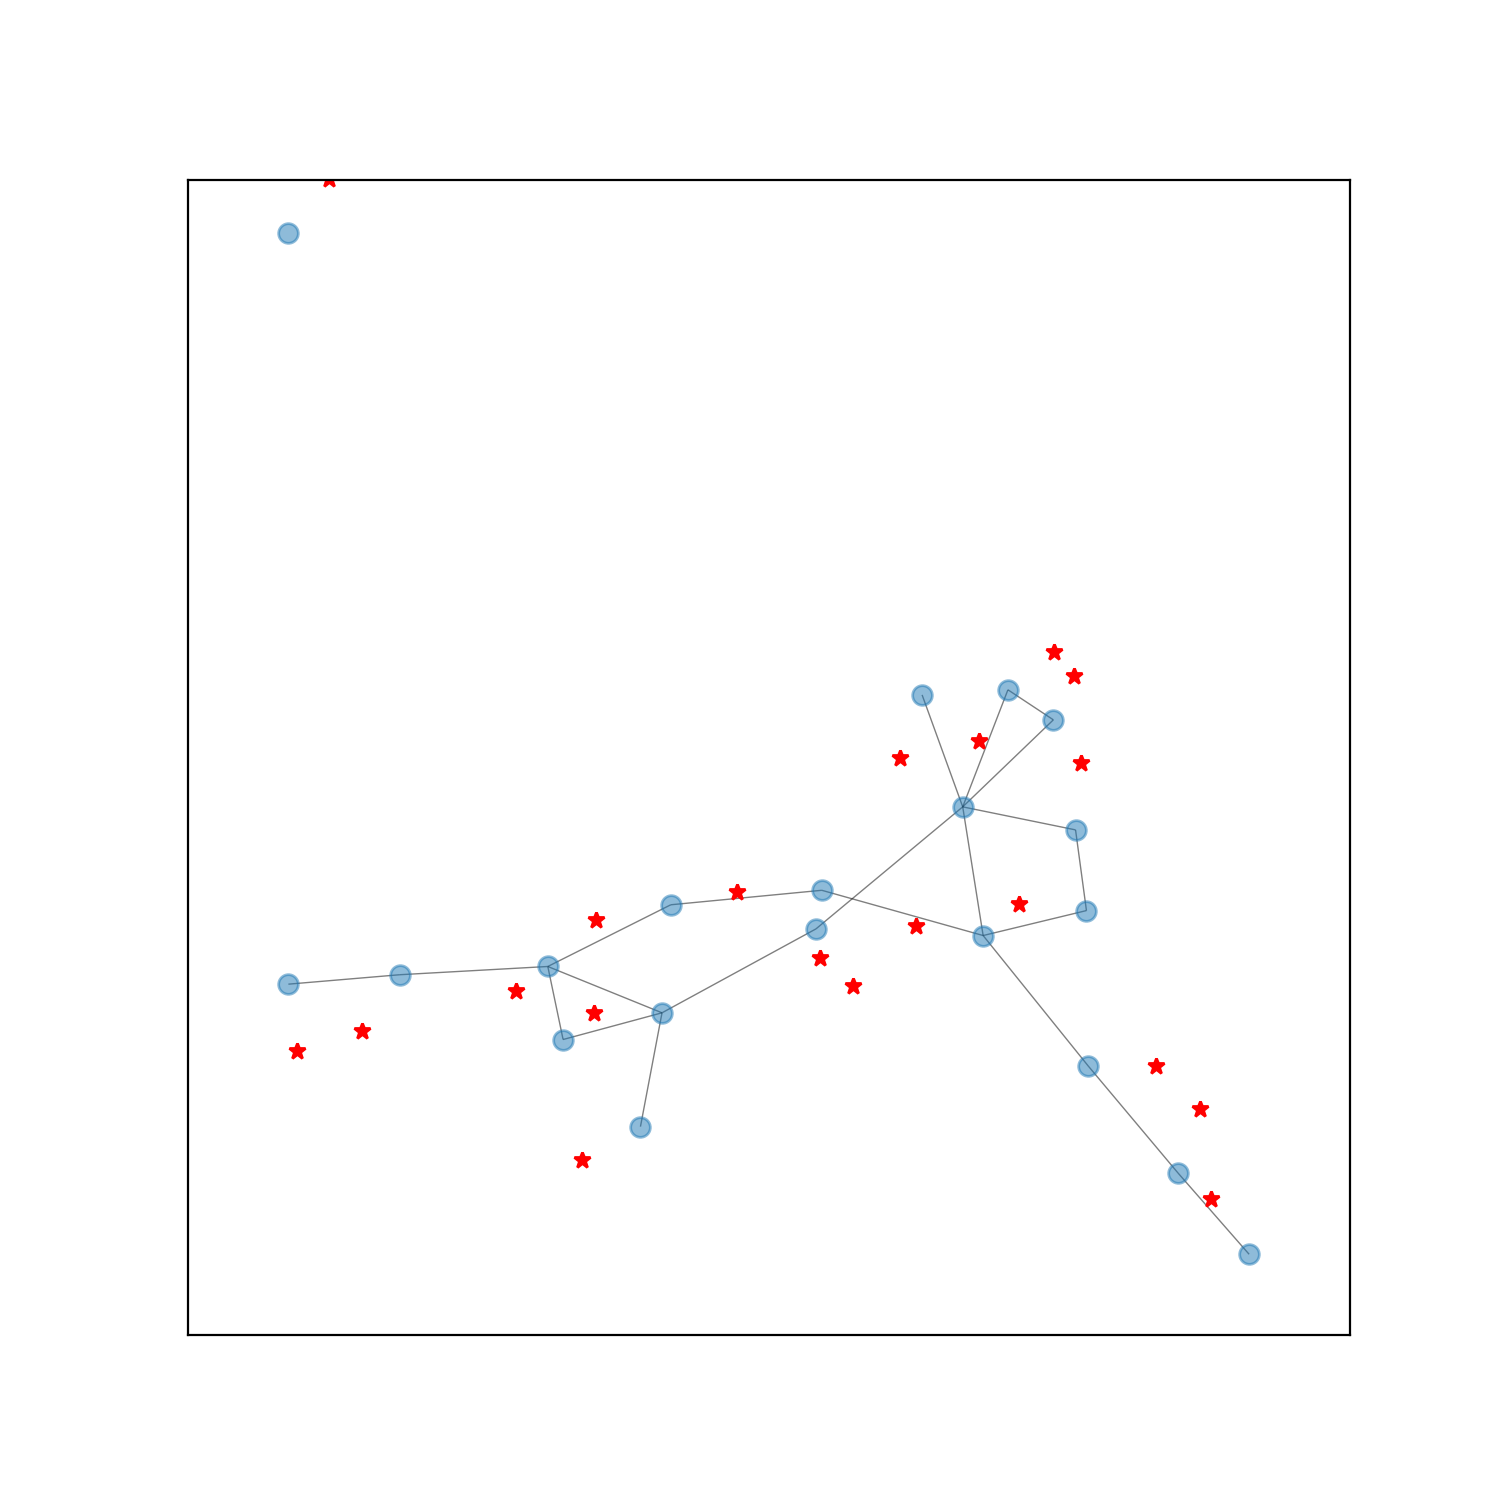

<IPython.core.display.Javascript object>


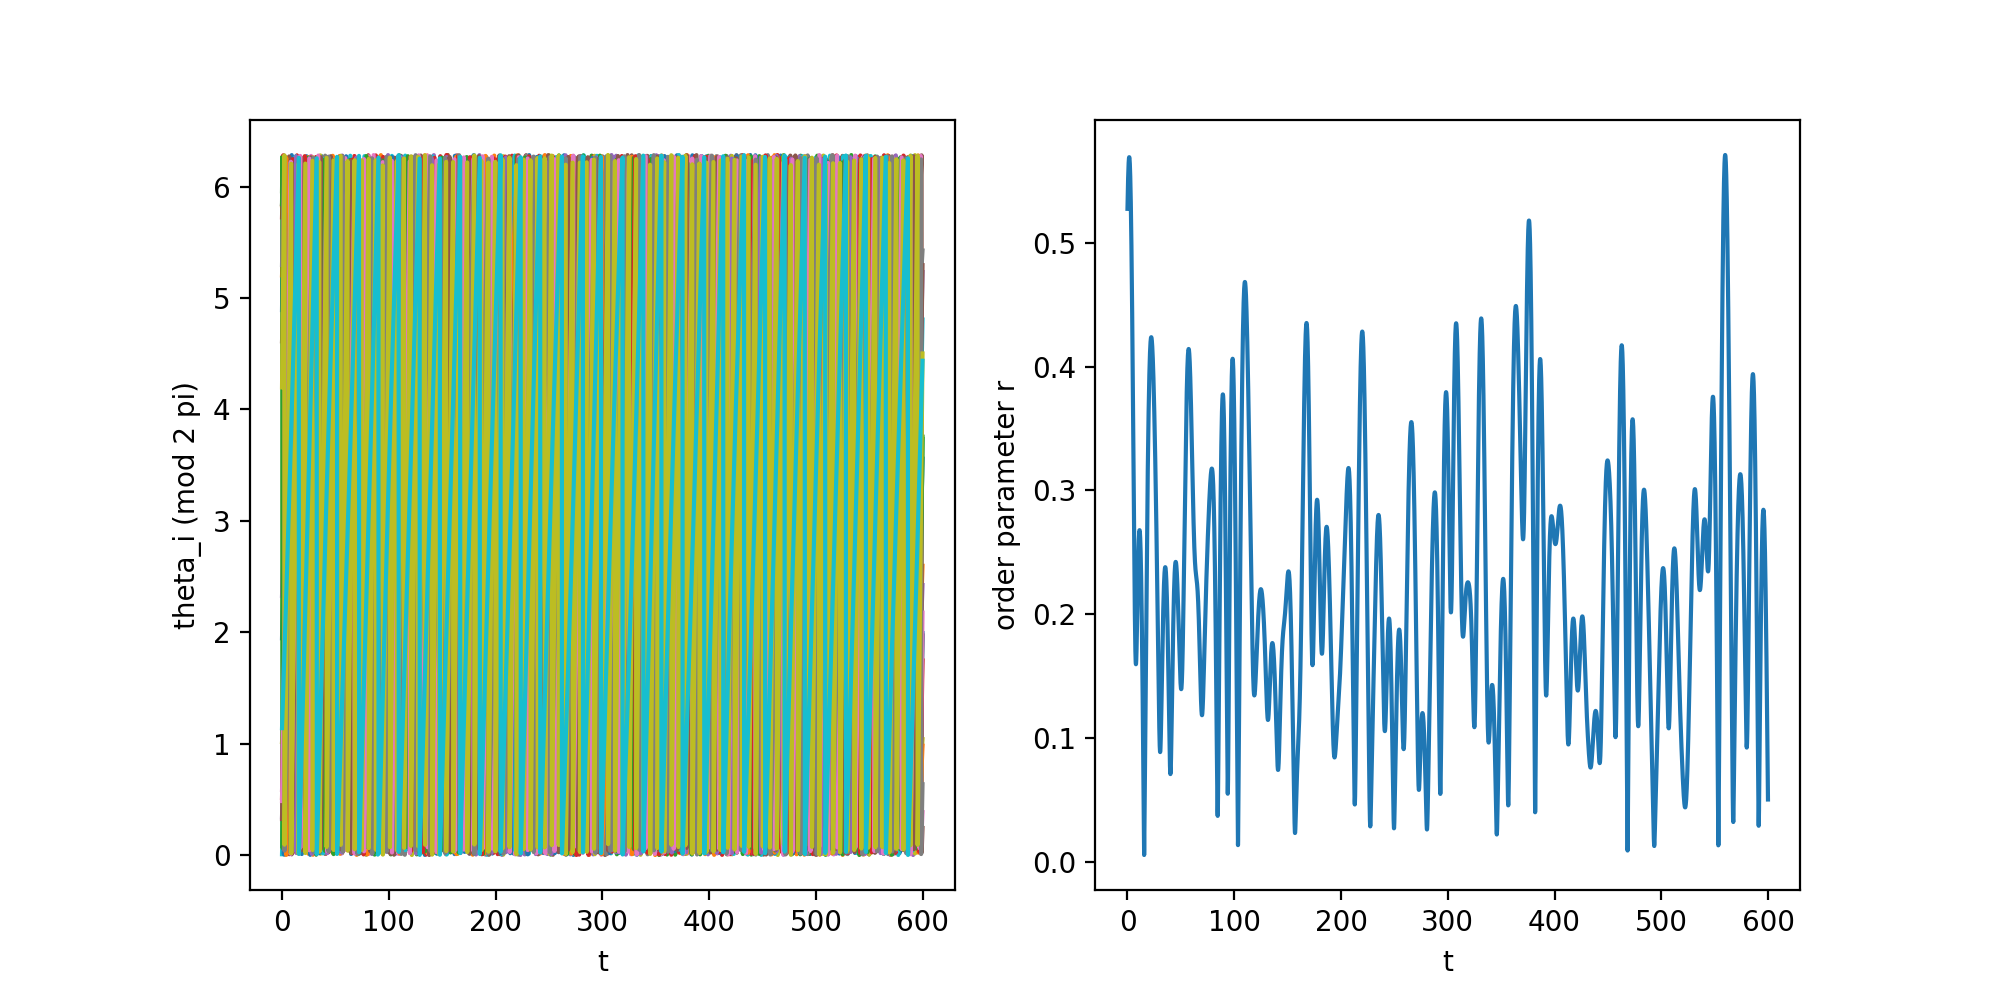

In [4]:
# The function is given all parameters as input
# The output is a list of the values of the order parameter over time
[thetas, orderPar] = Kuramoto_simulator(par, sim_set)

In [5]:
T0 = 200
sim_set.updatePlot = False
sim_set.plotEvolution = False
K_list = np.arange(0,1,0.05)
av_order = np.zeros(len(K_list))

for i in range(len(K_list)):
    print("K="+repr(K_list[i]))
    par.K = K_list[i]
    
    av_order_K = np.zeros(10)
    for j in range(10):
#         print("j="+repr(j))
        [thetas, orderPar] = Kuramoto_simulator(par, sim_set)
        av_order_K[j] = np.mean(orderPar[T0:-1])
    av_order[i] = np.mean(av_order_K)
    

from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(K_list, av_order)
plt.xlabel("K")
plt.ylabel("Average order parameter")

K=0.0
K=0.05
K=0.1
K=0.15000000000000002
K=0.2
K=0.25
K=0.30000000000000004
K=0.35000000000000003
K=0.4
K=0.45
K=0.5
K=0.55
K=0.6000000000000001
K=0.65
K=0.7000000000000001
K=0.75
K=0.8
K=0.8500000000000001
K=0.9
K=0.9500000000000001


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Average order parameter')

In [6]:
from matplotlib import pyplot as plt

plt.plot(K_list, av_order)
plt.xlabel("K")
plt.ylabel("Average order parameter")

Text(0, 0.5, 'Average order parameter')